In [14]:
%pylab inline
rcParams['figure.figsize'] = (10.0, 9.0)
import struct as st
import wave
import pyaudio as pya

Populating the interactive namespace from numpy and matplotlib


In [15]:
win = wave.open("Pantoja/Isa.wav","r") #Leemos el fichero

In [16]:
win.getnchannels() #Número de canales (Estéreo).

2

In [17]:
win.getsampwidth() #Anchura de muestra en bytes.

2

In [18]:
win.getframerate() #Frecuencia de muestreo.

44100

In [19]:
win.getnframes() #Número total de frames. (La muestra del canal izq y del derecho).

8095104

In [20]:
win.getnframes()/win.getframerate() #Duración del wav.

183.56244897959184

Si leemos una muestra, debemos de rebobinar si queremos volver a leerla.

In [21]:
primer_frame = win.readframes(1) #Leemos el primer frame
print(primer_frame) #Dos muestras

b'\x00\x00\x00\x00'


In [22]:
win.rewind()
diez_seg = win.readframes(10*44100)
#print(diez_seg) #Es una cadena ENOOOORME
diez_seg[99999]

255

In [23]:
des = st.unpack("<h", primer_frame[0:2])

des

(0,)

In [24]:
win.rewind()
a = win.readframes(win.getnframes())
print(a[:4])

b'\x00\x00\x00\x00'


In [25]:
b = st.unpack("<hh", a) #BUUUUUH


error: unpack requires a bytes object of length 4

In [26]:
b = st.unpack("<hh", a[:4])
b

(0, 0)

In [27]:
b = st.unpack("<{}h".format(win.getnchannels()*win.getnframes()), a)
#print(b) Tarda demasiado

In [28]:
ci = b[:len(b):2]
cd = b[1:len(b):2]

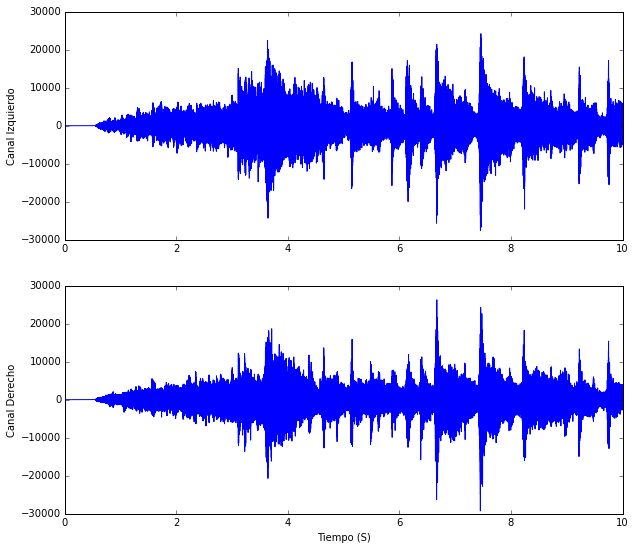

In [29]:
#Análsis en 10 segundos
subplot(2,1,1)
plot(arange(len(cd[:10*44100]))/44100, ci[:10*44100]) #Ahora muestra segundos
ylabel("Canal Izquierdo")
subplot(2,1,2)
plot(arange(len(cd[:10*44100]))/44100, cd[:10*44100])
ylabel("Canal Derecho")
xlabel("Tiempo (S)")

Creamos una ventana de análisis

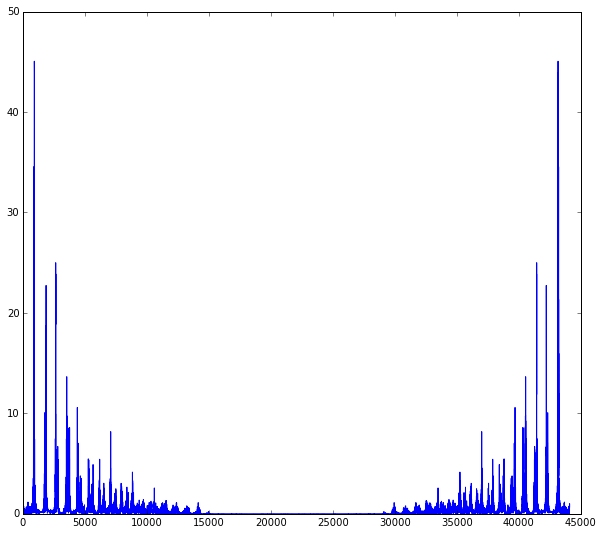

In [30]:
peri_anal = 1 #Periodo de análisis, relación inversa con la resolución que queremos (1Hz -> 1 Seg)
T = peri_anal
Fci = fft.fft(ci[0:int(T*44100)])/(T*44100) #Transformadas
Fcd = fft.fft(cd[0:int(T*44100)])/(T*44100)
plot(arange(0,44100,1),abs(Fci))

Se ve DEMASIADO si haces zoom, reduciremos la ventana a 0.5s -> 2Hz

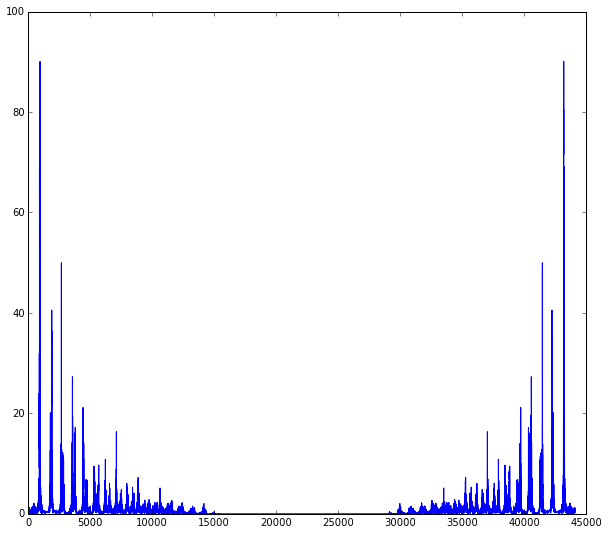

In [31]:
peri_anal = 0.5#Periodo de análisis, relación inversa con la resolución que queremos (1Hz -> 1 Seg)
T2 = peri_anal
Fci2 = fft.fft(ci[int(T2*44100):int(2*T2*44100)])/(T2*44100) #Transformadas
Fcd2 = fft.fft(cd[int(T2*44100):int(2*T2*44100)])/(T2*44100)
plot(arange(0,44100,1/T2),abs(Fci2))

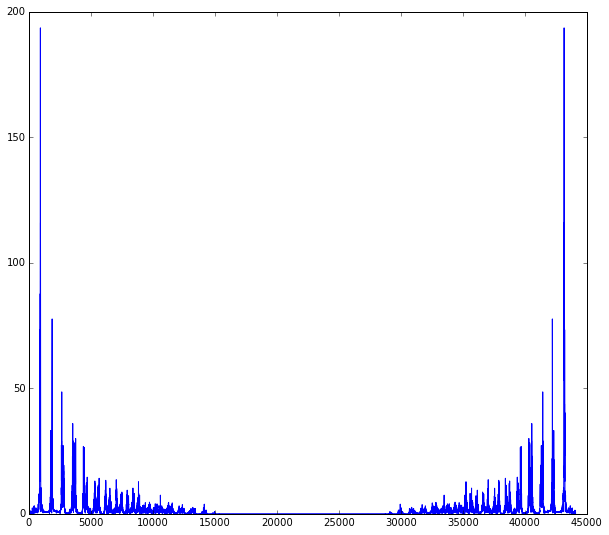

In [32]:
peri_anal = 0.25#Periodo de análisis, relación inversa con la resolución que queremos (1Hz -> 1 Seg)
T4 = peri_anal
Fci4 = fft.fft(ci[int(3*T4*44100):int(4*T4*44100)])/(T4*44100) #Transformadas
Fcd4 = fft.fft(cd[int(3*T4*44100):int(4*T4*44100)])/(T4*44100)
plot(arange(0,44100,1/T4),abs(Fci4))

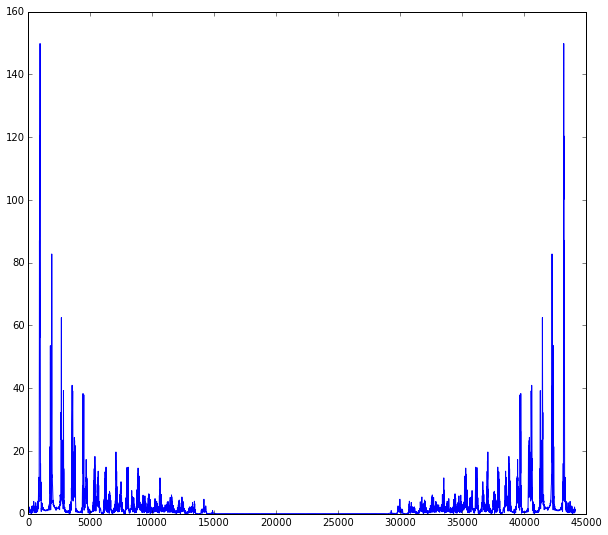

In [33]:
peri_anal = 0.125 #Periodo de análisis, relación inversa con la resolución que queremos (1Hz -> 1 Seg)
T8 = peri_anal
Fci8 = fft.fft(ci[int(7*T8*44100):int(8*T8*44100)])/(T8*44100) #Transformadas
Fcd8 = fft.fft(cd[int(7*T8*44100):int(8*T8*44100)])/(T8*44100)
plot(arange(0,44100,1/T8),abs(Fci8))

Todos juntos! (Y mirando el la0)

(750, 1000)

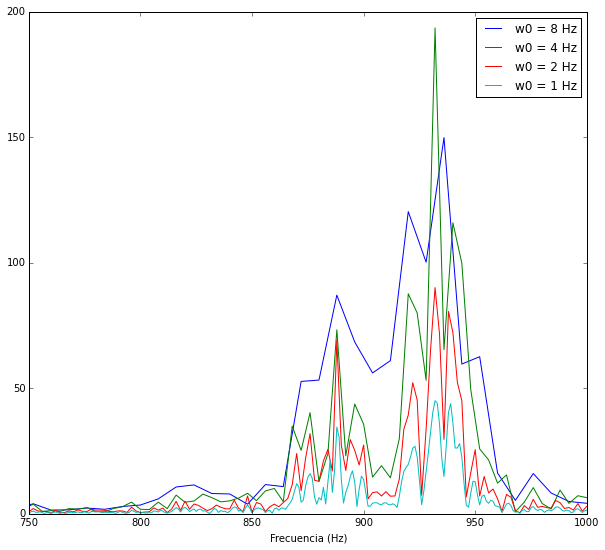

In [34]:
plot(arange(0,44100,1/T8),abs(Fci8),label="w0 = 8 Hz")
plot(arange(0,44100,1/T4),abs(Fci4),label="w0 = 4 Hz")
plot(arange(0,44100,1/T2),abs(Fci2),label="w0 = 2 Hz")
plot(arange(0,44100,1/T),abs(Fci),label="w0 = 1 Hz")
legend(loc="best")
xlabel("Frecuencia (Hz)")
xlim(750,1000)

# 12/03/15

In [35]:
(ncanales, ancho_muestra, frec_mues, nframes, comptipo, compnombre) = win.getparams()


# Espectrograma

86.1328125


/usr/lib/python3.4/site-packages/matplotlib/axes/_axes.py:6699: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


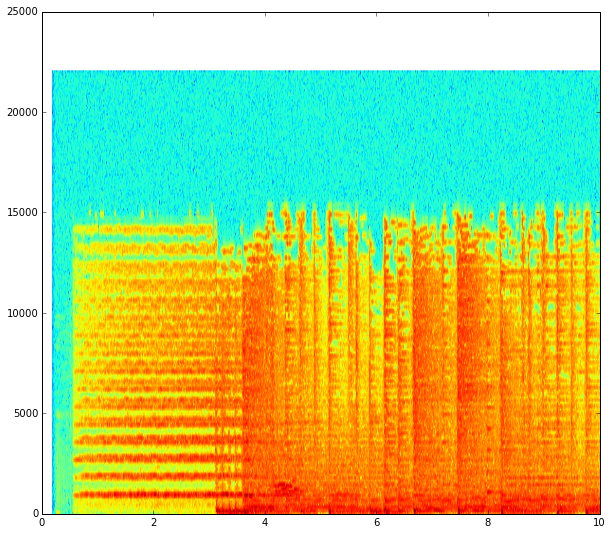

In [36]:
spec10seg = specgram(ci[0:10*44100],512,frec_mues)

resolucionFrec = (512/44100)**-1
print(resolucionFrec)

Podemos ver que se ha suprimido información a partir de 15000 Hz

1.0


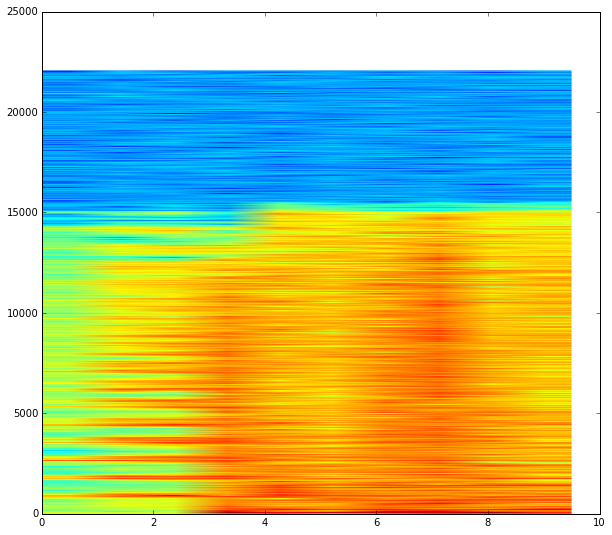

In [37]:
#Aumentamos la ventana.
spec10seg = specgram(ci[0:10*44100],44100,frec_mues)

resolucionFrec = (44100/44100)**-1
print(resolucionFrec)

A más resolución espectral, menos resolución temporal. (Heisenberg patata)

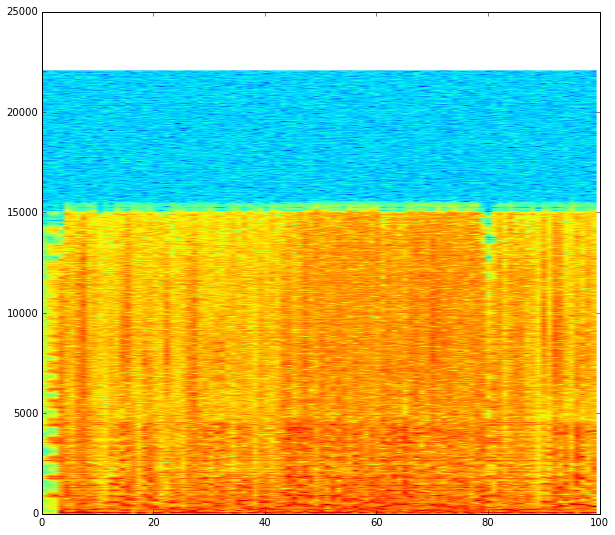

In [38]:
#Aumentamos el tiempo.
spec10seg = specgram(ci[0:100*44100],44100,frec_mues)


In [39]:
p = pya.PyAudio()
stream = p.open(format = p.get_format_from_width(2), channels = 2, rate = 44100, output = True)

In [40]:
stream.write(a[0:10*4*44100]) #Temazo 10 seg

# Comprobamos unpack

In [41]:
numero = 23
pnumero = st.pack("<h", numero)
print(pnumero)
dpnumero = st.unpack("<h", pnumero)
print(dpnumero)

b'\x17\x00'
(23,)


Para escribir un número negativo con signo, el primer bit se usa de signo (1-> neg, 0-> pos). Con el resto calculamos el complemento, y sumamos uno.

1101 -> - (010+1) = -3

# 16-03-15

## Creamos un archivo con un tono 

In [42]:
out_wav = wave.open("Pantoja/prueba.wav", "w")

In [43]:
ncanales = 1
ancho_muestra = 2 #Bytes, máximo a wav.
frec_mues = 44100
nframes = 44100*10
comptipo = "NONE"
compnombre = "not compressed"

params = (ncanales, ancho_muestra, frec_mues, nframes, comptipo, compnombre)
out_wav.setparams(params)

El programa del otro día:

In [44]:
def base_tiempos(t1=-2,t2=2,fm=44100):
    #Hay que muestrear al doble de la frecuencia
    T=t2-t1 #Periodo de análisis
    int_muestreo=1/fm #Distancia entre muestras
    num_mue_tot=T*fm
    
    #fm Frecuencia de muestreo

    tiempo = t1 + arange(num_mue_tot)/fm  #Por algún motivo queremos el intervalo abierto a la derecha
    return(tiempo)

def escalon(t,t0=0):
    """u(t-t0)"""
    j = zeros(len(t))
    i = ones(len(t))
    return(concatenate((j[t<t0],array((0.5,)),i[t>t0])))

def base_frecuencias(N=44100,fm=44100):
    """
    Calcula las frecuencias asociadas a una ventana de N muestras a una frecuencia de muestreo de fm
    """
    frecuencias = -fm / 2 + arange(N)*fm/N
    return(frecuencias)

def tono(tiempo, fr = 1000, amp = 1, fas = 0):
    signal = amp*cos(2*pi*fr*tiempo+fas)
    return(signal)

def ruido_blanco(tiempo, med = 0.0, sig = 1):
    ruido = random.normal(med,sig,tiempo.size)
    return(ruido)    

def gabor(tiempo, amp=1, frec=1000, tpos=0, sig=1, fas=0):
    tt = (tiempo - tpos) / sig
    signal = amp * tono(tiempo,frec,1.0,fas) * exp(-tt*tt)
    return(signal)

def escalon2(t):
    f = zeros(len(t))
    for i, el in enumerate(t):
        if t[i] > 0:
            f[i] = 1
        elif t[i] == 0:
            f[i] = 0.5
    return(f)

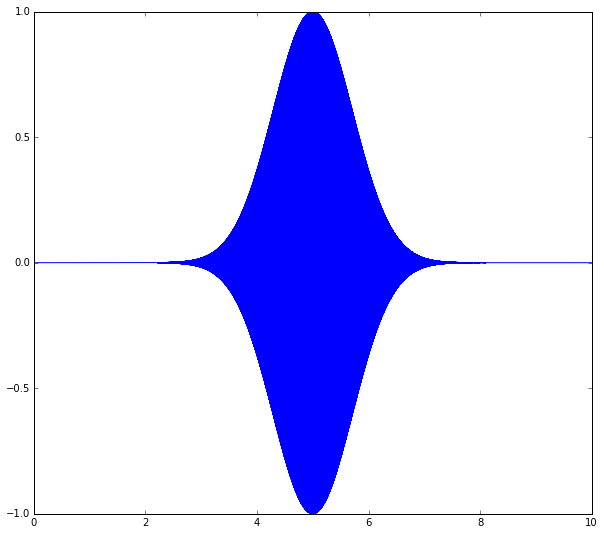

In [45]:
tiempos = base_tiempos(0,10)
ss = gabor(tiempos, tpos=5)
plot(tiempos,ss)

Tenemos 8 Bytes (Float), pero solo nos caben  2 Bytes. -> perdemos precisión en la amplitud (voltaje), cuantización de la señal.

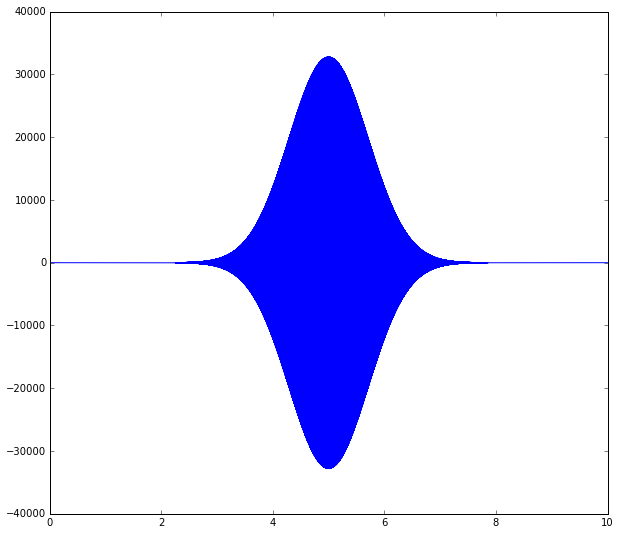

In [46]:
ssc = zeros(ss.shape, dtype="int16")
ssc = int16((ss-min(ss))/(max(ss)-min(ss))*65535 - 32768) #Normalizamos

plot(tiempos,ssc)

In [47]:
stream = st.pack("<{}h".format(len(ssc)), *ssc)
out_wav.writeframes(stream)

In [48]:
out_wav.close()